### **Objetivo:** Generar gráficos descriptivos, estadísticos y relacionales utilizando Matplotlib y Seaborn para extraer insights de los datasets Titanic e Iris. Se incluye un bonus de visualización interactiva con Plotly.

### 1. Configuración del Entorno en Google Colab

In [2]:
import tensorflow as tf

print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Instalar librerías adicionales si es necesario
!pip install seaborn plotly

# Importaciones estándar
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")

GPU disponible: []
Entorno configurado correctamente en Google Colab


### 2. Gráficos básicos y avanzados con Matplotlib
2.1. Carga de Datasets Obligatorios

Cargamos los datasets **Titanic** (para analizar supervivencia y variables categóricas) e **Iris** (para analizar relaciones entre características numéricas) utilizando el método `sns.load_dataset()`.

In [3]:
# Carga de los dos datasets obligatorios
df_titanic = sns.load_dataset('titanic')
df_iris = sns.load_dataset('iris')

print(f"Dataset Titanic cargado: {df_titanic.shape[0]} filas.")
print(f"Dataset Iris cargado: {df_iris.shape[0]} filas.")

# Mostramos el resumen de Titanic para saber qué vamos a visualizar
print("\nResumen Estadístico del Titanic:")
print(df_titanic.describe())

Dataset Titanic cargado: 891 filas.
Dataset Iris cargado: 150 filas.

Resumen Estadístico del Titanic:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


### 3. Visualizaciones Descriptivas y Estadísticas (Matplotlib & Seaborn)
### 3.1. Gráficos Básicos: Distribución de Variables

La visualización de distribuciones nos ayuda a entender la forma, el rango y los valores atípicos de una variable. Usamos:
1. **Histograma:** Para variables continuas (`age`).
2. **Gráfico de Barras/Conteo:** Para variables categóricas (`survived`).

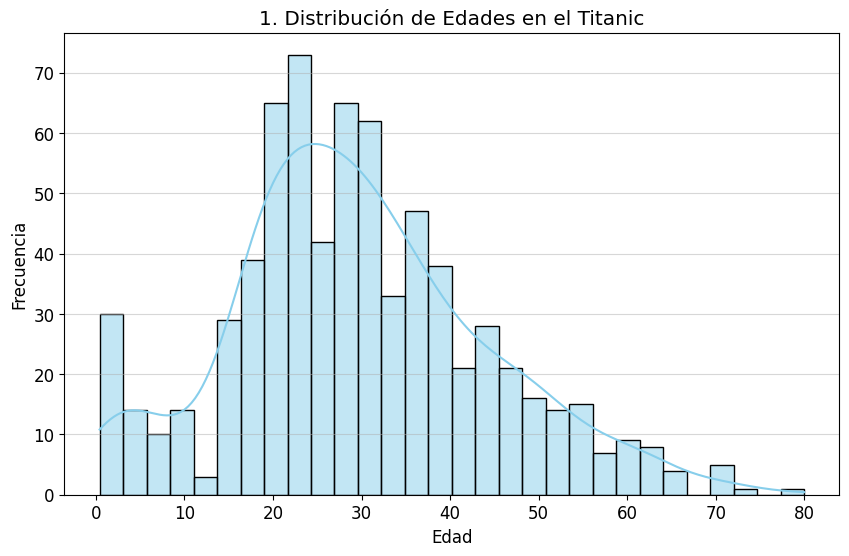

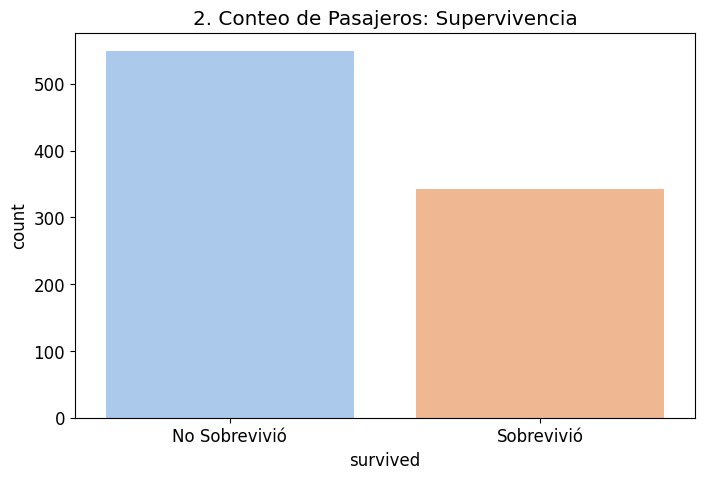

In [4]:
# 1. Histograma de la distribución de edad (Titanic)
# Usamos .dropna() para excluir los valores nulos que hay en la columna 'age'
plt.figure(figsize=(10, 6))
sns.histplot(df_titanic['age'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('1. Distribución de Edades en el Titanic')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.5)
plt.show()

# 2. Gráfico de Conteo de Supervivencia (Titanic)
plt.figure(figsize=(8, 5))
# El eje X 'survived' es 0=No Sobrevivió, 1=Sobrevivió
sns.countplot(x='survived', data=df_titanic, palette='pastel')
plt.title('2. Conteo de Pasajeros: Supervivencia')
plt.xticks([0, 1], ['No Sobrevivió', 'Sobrevivió'])
plt.show()

### 3.2. Visualizaciones Estadísticas: Relaciones y Comparaciones

Estos gráficos exploran cómo las variables se relacionan entre sí.
1. **Boxplot (Gráfico de Caja):** Compara la distribución de una variable numérica (Tarifa) a través de categorías (Clase).
2. **Gráfico de Barras Agrupado:** Muestra el impacto de dos categorías (Género y Clase) en la supervivencia.

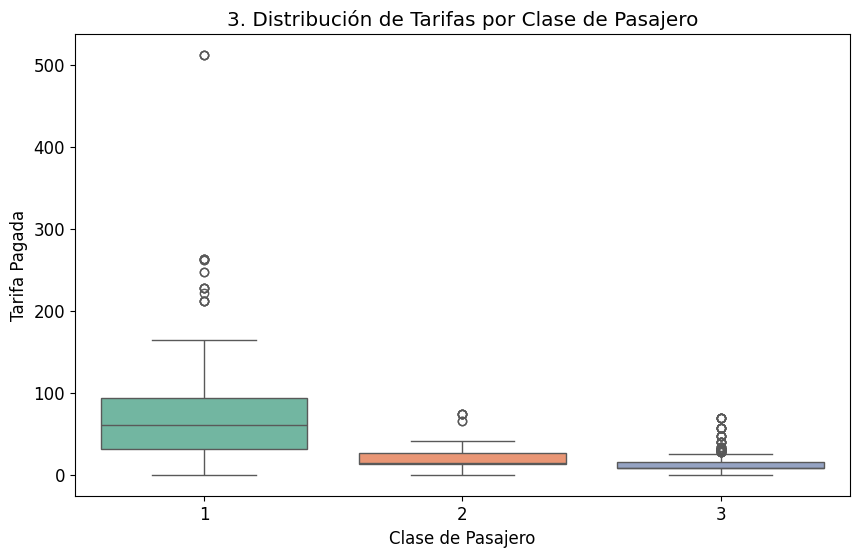

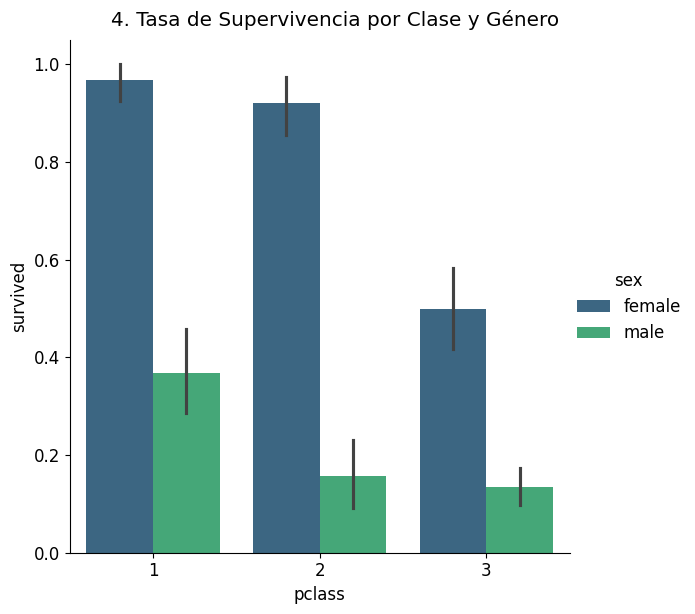

In [5]:
# 3. Boxplot: Comparar la distribución de la tarifa ('fare') por clase ('pclass')
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', data=df_titanic, palette='Set2')
plt.title('3. Distribución de Tarifas por Clase de Pasajero')
plt.xlabel('Clase de Pasajero')
plt.ylabel('Tarifa Pagada')
plt.show()

# 4. Gráfico de barras agrupado: Tasa de Supervivencia por Sexo y Clase
# 'kind='bar'' calcula la media del eje Y ('survived') por cada grupo
sns.catplot(x='pclass', y='survived', hue='sex', data=df_titanic, kind='bar', height=6, palette='viridis')
plt.suptitle('4. Tasa de Supervivencia por Clase y Género', y=1.02)
plt.show()

### 3.3. Gráficos Avanzados: Correlación y Multivariante

1. **Mapa de Calor (Heatmap):** Visualiza la matriz de correlación, mostrando qué tan fuertemente se relacionan las variables numéricas entre sí (usando el dataset Iris).
2. **Pairplot:** Genera un conjunto de gráficos de dispersión (Scatterplots) para todas las combinaciones de características, ideal para ver la separación de clases (especies).

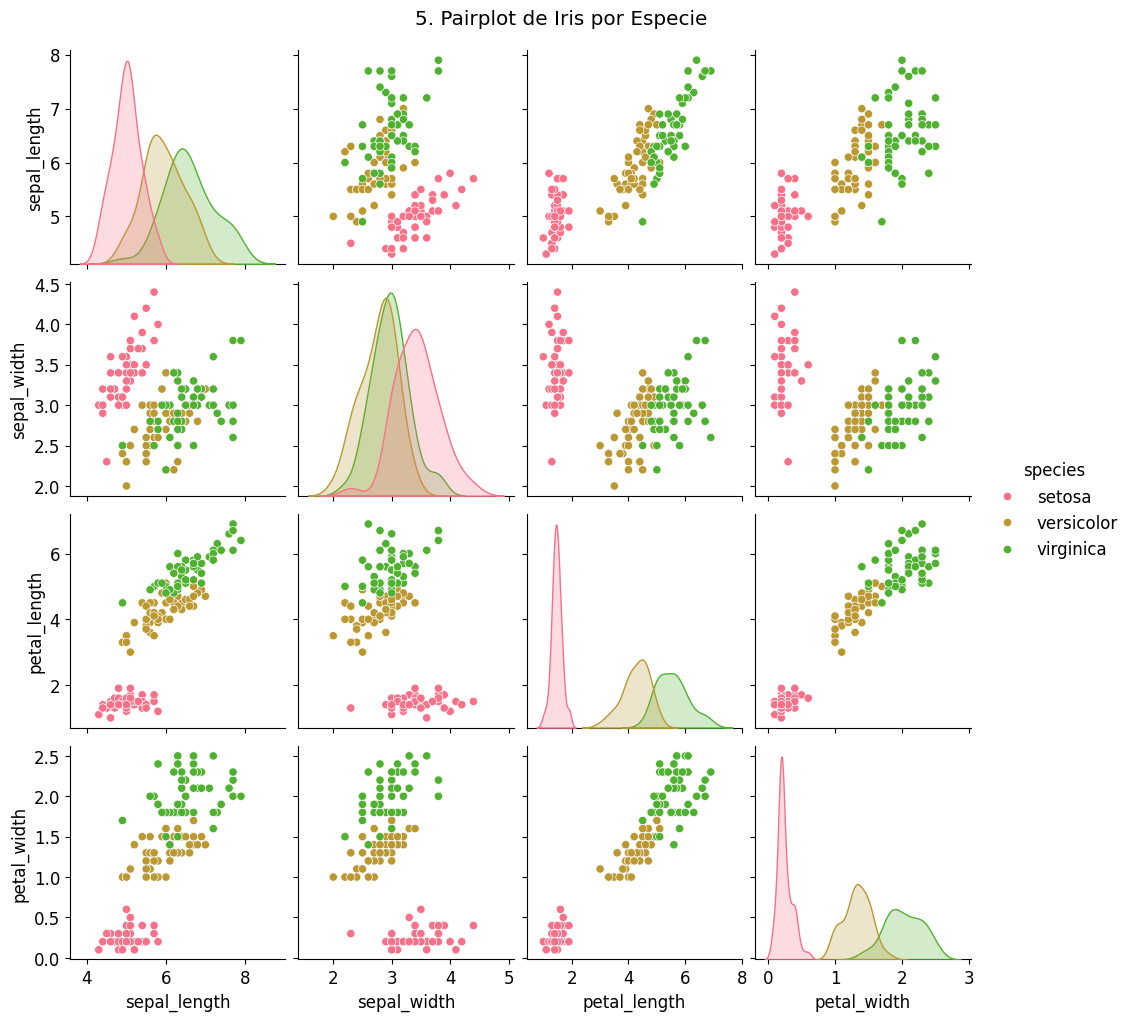

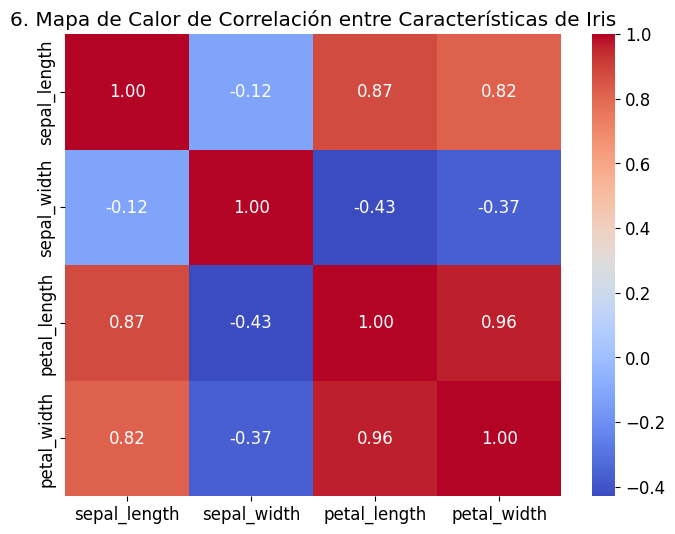

In [6]:
# 5. Pairplot: Muestra la relación entre todas las características de Iris
# La diagonal muestra la distribución (kde) de cada variable
sns.pairplot(df_iris, hue='species', diag_kind='kde')
plt.suptitle('5. Pairplot de Iris por Especie', y=1.02)
plt.show()

# 6. Heatmap de la matriz de correlación (Iris)
# Se seleccionan las columnas numéricas de Iris para calcular la correlación
corr_matrix = df_iris.iloc[:, :-1].corr()

plt.figure(figsize=(8, 6))
# annot=True muestra el valor de la correlación en la celda
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('6. Mapa de Calor de Correlación entre Características de Iris')
plt.show()

### 4. Bonus: Gráficos Interactivos con Plotly
Plotly permite crear gráficos 3D y dinámicos que se pueden manipular directamente en el notebook. Esto es útil para el análisis exploratorio avanzado.

In [7]:
import plotly.express as px

# Gráfico interactivo de dispersión 3D (muestra cómo se separan las especies)
fig = px.scatter_3d(df_iris, x='sepal_length', y='sepal_width', z='petal_width', color='species',
                    title='BONUS: Iris: Scatter 3D Interactivo por Especie')
fig.show()

### 5. Integración Final con GitHub
Instrucción: Usa la celda de GitHub que ya corregimos, pero asegúrate de cambiar el nombre del archivo y el mensaje del commit.

In [ ]:
from getpass import getpass
from google.colab import drive
from google.colab import auth
import subprocess
import os

# ==============================
# CONFIGURACIÓN Y AUTENTICACIÓN
# ==============================

# Pide el token de forma segura (pégalo aquí)
token = getpass("Pega tu token de GitHub aquí (no se verá): ")

# Montar Drive (necesario para copiar el archivo)
drive.mount('/content/drive', force_remount=True)
auth.authenticate_user() # Autenticación de Google (si usas el método clásico)

# Configuración de Git (¡NECESARIO para el commit!)
!git config --global user.email "defloresa@uees.edu.ec"
!git config --global user.name "Flores Denisse"


# ==============================
# LIMPIEZA, CLONACIÓN Y NAVEGACIÓN
# ==============================

%cd /content
REPO_NAME = "UEES-IA-Semana1-FloresDenisse"
GITHUB_USERNAME = "defloresa-uees"

# Limpiar intento anterior de clonación
print(f"\nBorrando intento anterior de clonación de {REPO_NAME}...")
!rm -rf $REPO_NAME

# Clonar el repositorio
print(f"Clonando el repositorio {REPO_NAME}...")
!git clone https://github.com/{GITHUB_USERNAME}/{REPO_NAME}.git /content/{REPO_NAME}

# Navegar a la carpeta clonada
%cd /content/{REPO_NAME}

# ==============================
# COPIA DESDE DRIVE (¡CORRECCIÓN CLAVE AQUÍ!)
# ==============================

# 1. Crear la estructura de carpetas
!mkdir -p ./02_Laboratorio/notebooks/

# 2. Copia el archivo DESDE GOOGLE DRIVE a la carpeta local del repositorio
# Asegúrate de que la ruta de origen sea EXACTA a la ubicación en tu Drive.
print("\nCopiando el notebook desde Google Drive...")
!cp "/content/drive/MyDrive/Colab Notebooks/02_Visualizacion_Datos.ipynb" ./02_Laboratorio/notebooks/


# ==============================
# COMMIT Y PUSH
# ==============================

# Commit
!git add .
!git commit -m "Completado: 02_Visualizacion_Datos.ipynb - Visualización y EDA"

# TRUCO: Sustituye el token en la URL remota para que el push no falle
subprocess.run(["git", "remote", "set-url", "origin", f"https://{token}@github.com/{GITHUB_USERNAME}/{REPO_NAME}.git"])

# Push final
!git push origin main

print("\n¡Notebook 02 subido exitosamente a GitHub! Verifica el link: https://github.com/defloresa-uees/UEES-IA-Semana1-FloresDenisse")

Pega tu token de GitHub aquí (no se verá): ··········
